# 10. Market Score 전략

In [1]:
import pandas as pd
import numpy as np

# Finance Library import
from Library import FinanceLibrary as fl

In [2]:
df = pd.read_csv("..\\Data\\KOSPI_Daily_1980data.csv", encoding="utf-8")

In [3]:
df.index = pd.to_datetime(df["Date"])
df = df.resample("W-FRI")._upsample(None).interpolate()  #주간데이터
KOSPI = df["Close"]

#KOSPI.rename("KOSPI", inplace=True)
KOSPI = pd.DataFrame(KOSPI,index=df.index)

In [4]:
### Market Score구하기
MScore = fl.MarketScore(KOSPI)
KOSPI["MarketScore"] = pd.Series(MScore,index=KOSPI.index)
KOSPI["MS10"] = pd.Series(KOSPI["MarketScore"].rolling(window=10).mean(), index=KOSPI.index)
KOSPI["MS20"] = pd.Series(KOSPI["MarketScore"].rolling(window=20).mean(), index=KOSPI.index)
KOSPI["MS30"] = pd.Series(KOSPI["MarketScore"].rolling(window=30).mean(), index=KOSPI.index)
KOSPI["ma60"] = pd.Series(KOSPI["Close"].rolling(window=60).mean(), index=KOSPI.index)

### 구간 데이타 구하기

In [8]:
#data = KOSPI["2017":"2018"]
#data = KOSPI["2017"]
#data = KOSPI["2018"]
data = KOSPI["2016":"2018"]

### KOSPI & Market Score 그래프그리기

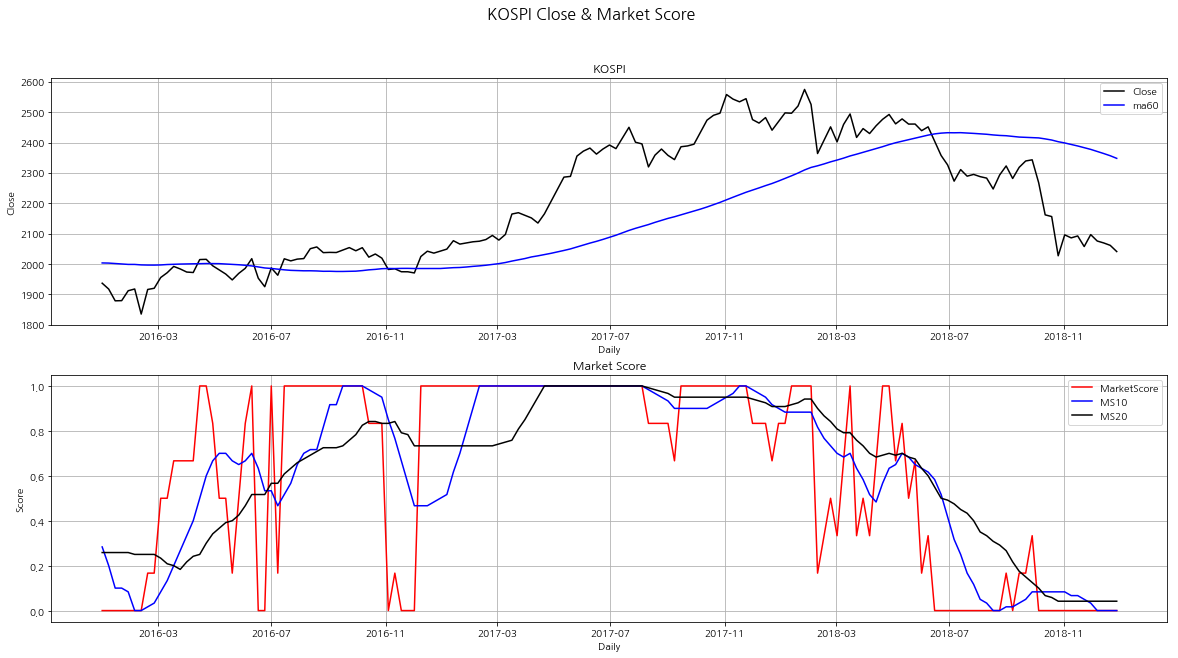

In [9]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
from matplotlib import rc, font_manager
rc("font", family="NanumGothic")

%matplotlib inline
fig, axs = plt.subplots(2, 1,figsize=(20,10))
fig.suptitle('KOSPI Close & Market Score', fontsize=16)

axs[0].plot(data["Close"], color="Black")
axs[0].plot(data["ma60"], color="Blue")
axs[0].set_title('KOSPI')
axs[0].set_xlabel('Daily')
axs[0].set_ylabel('Close')
axs[0].grid(True)
axs[0].legend()

index = [0.1,0.5,1.0]
#axs[1].bar(data.index, data["MarketScore"],color="Red")
axs[1].plot(data["MarketScore"],color="Red")
axs[1].plot(data["MS10"],color="Blue")
axs[1].plot(data["MS20"],color="Black")
axs[1].set_xlabel('Daily')
axs[1].set_title('Market Score')
axs[1].set_ylabel('Score')
axs[1].grid(True)
axs[1].legend()